In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
import random 
import copy
from itertools import compress
from itertools import groupby
import scipy.optimize as opt
import time
import matplotlib
import pickle

In [2]:
def system1_ODEs(t,z,params):
    k, p = z
    n, m, kba, kbb, kua, kub, gammaA, gammaB, Atot, Btot, F = params
        
    dkdt = kba * ((Atot- n * k) / (1 + gammaA * k / (p + F)))**n - kua * k
    dpdt = kbb * ((Btot- m * p) / (1 + gammaB * k / (p + F)))**m - kub * p
    
    dzdt = [dkdt, dpdt]
    return(dzdt)

In [3]:
def system1_Jac(t,z,params):
    n, m, kba, kbb, kua, kub, gammaA, gammaB, Atot, Btot, F = params
    k, p = z
    
    jac = np.array([[
            -kua + (kba*n*(n*(F + p) + Atot*gammaA)*
                    (((Atot - k*n)*(F + p))/(F + p + k*gammaA))**n)/
                    ((-Atot + k*n)*(F + p + k*gammaA)),
                    (k*kba*n*gammaA*(((Atot - k*n)*(F + p))/(F + p + k*gammaA))**n)/
                    ((F + p)*(F + p + k*gammaA))],
    [-((kbb*m*gammaB*(((F + p)*(Btot - m*p))/(F + p + k*gammaB))**m)/(F + p + k*gammaB)),
     (-(kub*(F + p + k*gammaB)**2) + kbb*m*(((F + p)*(Btot - m*p))/(F + p + k*gammaB))**(-1 + m)*
      (k*(Btot - m*p)*gammaB - m*(F + p)*(F + p + k*gammaB)))/(F + p + k*gammaB)**2]])
        
    return jac

In [4]:
# def system1_ODEs_full(t,z,params):
#     K, P = z
#     n, m, kba, kbb, kua, kub, gammaA, gammaB, Atot, Btot, F = params
        
#     dkdt = kba * ((Atot- n * K) / (1 + gammaA * K / (P + F)))**n - kua * K
#     dpdt = kbb * ((Btot- m * P) / (1 + gammaB * K / (P + F)))**m - kub * P

#     dzdt = [dkdt, dpdt]
#     return(dzdt)

In [5]:
def system1_Sol(tSpan, params, initialConditions, toPlot, plotLog=False, atol=1e-12, rtol=1e-6):
    odeSol = scipy.integrate.solve_ivp(lambda tSpan, z: system1_ODEs(tSpan, z, params),
                                        tSpan,initialConditions,method = 'Radau', vectorized=False,
                                        jac = lambda tSpan,z: system1_Jac(tSpan,z,params),
                                        atol=atol, rtol=rtol)
    z = np.transpose(odeSol.y)
    t = odeSol.t
    
    if toPlot:
        system1_Plot_for_Fig(t, z, params, initialConditions, plotLog=plotLog)
    return z,t

In [6]:
def system1_Plot_for_Fig(t, z, params, initialConditions, plotLog=False):
    
    n, m, kba, kbb, kua, kub, gammaA, gammaB, Atot, Btot, f = params
    k = z[:,0]
    p = z[:,1]
    lenTStart = int(len(z[:,0])/10)

    plt.plot(t[lenTStart:], k[lenTStart:], 'b', label='k')
    
    if not plotLog:
        plt.plot(t[lenTStart:], p[lenTStart:], 'k', label='p')
    else:
        plt.semilogy(t[lenTStart:], p[lenTStart:], 'k', label='p')

    plt.ylabel(r'concentration ($\mu$M)')
    plt.xlabel('time (s)')
    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0),fontsize = 12)
    #plt.ylim(top=Atot)
    plt.show()

In [7]:
def save(obj, filename):
# =============================================================================
#     Save an object to a file
# =============================================================================
    if not filename[-7:] == '.pickle':
        filename = filename + '.pickle'
    with open(filename, 'wb') as handle:
        pickle.dump(obj, handle, protocol=4) #protocol 4 came out with Python version 3.4


def load(filename):
# =============================================================================
#     Load an object from a file
# =============================================================================
    if not filename[-7:] == '.pickle':
        filename = filename + '.pickle'
    with open(filename, 'rb') as handle:
        data = pickle.load(handle)
    return data

(oscParamsn2m2Exp, oscAlpha1sn2m2Exp, oscAlpha3sn2m2Exp, oscAlpha4sn2m2Exp, 
 oscPeriodsn2m2Exp, nonOscParamsn2m2Exp, nonOscAlpha1sn2m2Exp, nonOscAlpha3sn2m2Exp, 
 nonOscAlpha4sn2m2Exp) = load(
         'n2m2_for_fig_3.pickle')

(oscParamsn2m2NoApprox, oscAlpha1sn2m2NoApprox, oscAlpha3sn2m2NoApprox, oscAlpha4sn2m2NoApprox, 
 oscPeriodsn2m2NoApprox, nonOscParamsn2m2NoApprox, nonOscAlpha1sn2m2NoApprox, nonOscAlpha3sn2m2NoApprox, 
 nonOscAlpha4sn2m2NoApprox) = load(
         'n2m2_no_approx.pickle')

# oscParams_removedByApprox = [i for i in oscParamsn2m2NoApprox if i not in oscParamsn2m2Exp]
# Each parameter set consists of:
# n, m, kba, kbb, kua, kub, gammaA, gammaB, Atot, Btot, F = params

In [34]:
print(len(oscParamsn2m2NoApprox))
print(len(oscParamsn2m2Exp))

1717
1039


In [9]:
len(nonOscParamsn2m2NoApprox)

48283

In [35]:
oscParams = oscParamsn2m2Exp#oscParamsn2m2NoApprox
periods = oscPeriodsn2m2Exp#oscPeriodsn2m2NoApprox

In [36]:
# KlistCopy = copy.copy(Klist)
# PlistCopy = copy.copy(Plist)

In [37]:
# Initialize amplitude arrays
num_osc = len(oscParams)
KA_array = np.zeros(num_osc)
PA_array = np.zeros(num_osc)
kA_array = np.zeros(num_osc)
pA_array = np.zeros(num_osc)
kpA_array = np.zeros(num_osc)
ppA_array = np.zeros(num_osc)
kpA2_array = np.zeros(num_osc)
ppA2_array = np.zeros(num_osc)

Klist = [None for _ in range(num_osc)]
Plist = [None for _ in range(num_osc)]

In [39]:
Klist = load('n2m2_for_fig_3_kinase_multimer_integration.pickle')
Plist = load('n2m2_for_fig_3_phosphatase_multimer_integration.pickle')

In [13]:
# def amplitude_fxn(arr):
#     # Given an array of concentrations, arr, calculate the amplitude
#     return((max(arr) - min(arr)) / ((max(arr) + min(arr)) / 2))

In [40]:
def amplitude_fxn(arr):
    # Given an array of concentrations, arr, calculate the amplitude
    return(max(arr) / min(arr))

In [41]:
num_periods_to_integrate = 12

start = time.time()
for e, params in enumerate(oscParams):
    if e % 10 == 0:
        print('Starting parameter set number ' + str(e) + ' out of ' + str(num_osc) + 
              '; time elapsed = ' + str(time.time() - start))
    
    period = periods[e]
    n, m, kba, kbb, kua, kub, etaK, etaP, ktot, ptot, pTilde = params
    
    atol = 1e-16
    rtol = 2.3e-14
    
    min_k = -1
    min_kp = -1
    negK = False
    
    while min_k < 0 or min_kp < 0:
        
        if Klist[e] is None or negK:  # negK is introduced to make sure what we load doesn't lead to negative k or kp
            z,t = system1_Sol([0, num_periods_to_integrate * period],
                              params, [0, 0], False, False, atol=1e-16, rtol=1e-14)
            ti = np.abs(t - (num_periods_to_integrate-1) * period).argmin()  # index of t one period from the end

            K = z[ti:,0]  # kinase multimer value over one period
            P = z[ti:,1]  # phosphatase multimer value over one period

        else:
            K = Klist[e]
            P = Plist[e]

        k = (ktot - n*K) / (1 + etaK * K / (P + pTilde))
        p = (ptot - m*P) / (1 + etaP * K / (P + pTilde))

        kp = ktot - k - n*K
        pp = ptot - p - m*P

        kp2 = etaK * K * (ktot - n*K) / (P + pTilde + etaK * K)  # equivalent to kp
        pp2 = etaP * K * (ptot - n*P) / (P + pTilde + etaP * K)  # equivalent to pp
        
        min_k = min(k)
        min_kp = min(kp)
        
        if min_k < 0 or min_kp < 0:
            negK = True
        
        atol /= 10
        rtol /= 10
    
    print(min(k))
    print(min(kp))
    
    # Measure amplitudes
    
    # If multimers fluoresce and monomers don't
    KA = amplitude_fxn(K)
    PA = amplitude_fxn(P)
    
    # If unphosphorylated monomers fluoresce and others don't
    kA = amplitude_fxn(k)
    pA = amplitude_fxn(p)
    
    # If monomers fluoresce when phosphorylated
    kpA = amplitude_fxn(kp)
    ppA = amplitude_fxn(pp)
    
    kpA2 = amplitude_fxn(kp2)
    ppA2 = amplitude_fxn(pp2)
    
    KA_array[e] = KA
    PA_array[e] = PA
    kA_array[e] = kA
    pA_array[e] = pA
    kpA_array[e] = kpA
    ppA_array[e] = ppA
    kpA2_array[e] = kpA2
    ppA2_array[e] = ppA2
    Klist[e] = K
    Plist[e] = P
    

Starting parameter set number 0 out of 1039; time elapsed = 0.0007088184356689453
5.870655088580666e-06
0.000667766521079391
0.0002884086991173255
0.3603454208584162
2.9062593649258184e-05
0.0012038579942995173
2.1799883654609547e-05
0.0008702606390774809
0.0009881941819264645
0.8311906736638438
0.00014563520952113408
0.010478554916366447
0.003331993822850132
0.02596133065750299
0.00047396496798881
0.019494819129690838
0.010995146144046685
4.610808851484708
0.005546249455930334
0.10013040125507124
Starting parameter set number 10 out of 1039; time elapsed = 0.04549574851989746
7.825678415131395e-05
0.0011859059830978123
2.9905653472336988e-05
0.1541422085856739
1.1004048054474322e-05
0.001442562998095975
0.00010838843217840403
0.004089066709811812
0.0032286629854979226
0.04589291589158313
0.00017917985507491396
0.005220113279772465
3.1455931073358626e-05
0.002195065169640946
0.0003271293557789877
0.0073028579829848474
4.07750353090819e-05
0.005405522462902933
0.0007969077951221782
0.01

5.233251194335787e-07
21.08818511192596
5.558154664828232e-07
0.36180095125764455
0.00023482720953850464
15.543663031128276
Starting parameter set number 170 out of 1039; time elapsed = 1.8106448650360107
6.090438510532194e-05
5.454572673154983
1.2343904634575327e-06
24.412736002497706
0.09633705950214927
94.21559353757364
6.106079818109959e-07
35.90248863729738
0.00033626894315256784
0.3692950197850413
6.993849886156178e-07
12.33437653861761
7.536399955244764e-05
1.7012651419404667
0.00019060119566638708
6.984070074565137
0.0069642600413950565
17.14949943814799
2.1835753447544227e-05
4.087995615944532
Starting parameter set number 180 out of 1039; time elapsed = 1.9883227348327637
0.00017661301897907897
14.85576260060315
3.547851907902762e-05
2.8934784508396296
0.15304650026419114
59.970382104905816
0.0002557430722451921
0.001220376585835421
5.26205882634237e-05
9.659077667484011
5.573489682778574e-05
18.554668902789814
0.0021585417928038837
22.312736259969988
1.2297755708831305e-06
0

2.5969334662436697e-07
13.452773598914275
1.724471918414391e-05
0.2854289998875208
7.450355420280108e-06
46.24328713224884
Starting parameter set number 340 out of 1039; time elapsed = 4.628833055496216
9.61487677598846e-06
0.1387830496300766
0.009513273855672685
30.535035717438742
0.0005302518012274192
60.649955397441
7.993694681834414e-08
0.015427375243067469
2.687867034772813e-06
0.4240114815803857
0.09742831280440459
3.107877041552609
0.0007967900138767054
2.5421897557281152
0.002506498193419788
0.30636250751264127
0.0009149538277596046
1.5260850929821153
0.00018081331154698379
9.571015025699346
Starting parameter set number 350 out of 1039; time elapsed = 4.795876741409302
0.02472934859574264
19.98536873600245
3.2626753553901008e-06
1.206492533683301
0.004032933272606645
0.30597017216306904
0.0033567306307684627
7.3183366730217125
9.944266445540418e-05
0.02322004188147566
0.00028267717925544215
0.9906769583175313
0.0008607967480125975
26.641214500317577
2.6727230076045905e-07
0.33

4.0193314954605446e-05
0.0743833858196496
0.013714240418225677
9.88183624529491
Starting parameter set number 510 out of 1039; time elapsed = 7.648744821548462
4.0722995692114784e-05
0.2954671644827598
2.7088898116424704e-05
64.02540047660652
1.8807751283339062e-05
0.001389274733510571
9.993327083084178e-05
2.2139171722434794
3.2802971049263972e-06
0.0006200545370245076
1.1935758224875989e-08
0.14441623297117523
6.934770510060578e-05
9.142050304951955
9.45979086714743e-06
0.005770777432386682
1.2181707939794549e-05
0.061248543687362406
1.7802513806035187e-05
1.7694425269125718
Starting parameter set number 520 out of 1039; time elapsed = 7.785717010498047
1.2681265607763303e-05
4.684762761017857
0.0001652176014948042
1.6192947914069766
0.06869414211462516
8.559329226146994
0.06067314153437955
77.01545126622904
6.505652307136342e-06
28.7644046388887
1.2489339791041458e-05
0.28256693170035246
2.808638679872172e-05
7.053309128596454
7.494973999754323e-05
0.06655590891288636
1.415605364817

5.2561128713913063e-05
0.36030554075623117
7.342701730387382e-06
0.004516043361174386
5.842839420704542e-07
0.10866215315551023
6.8352346438724285e-06
40.02793578810073
0.0006895001568555578
0.18042196737261887
3.617422976939457e-05
1.2699660943906999
6.492988824991546e-05
27.734839290100098
0.0005793144419150568
0.11604093621157091
3.7880741631842265e-05
0.5599452416994694
Starting parameter set number 690 out of 1039; time elapsed = 10.558387994766235
3.5831322561943455e-06
0.24679268839127758
0.0009815974605602673
0.47268892179367084
3.4046924383531307e-06
3.8580245590919553
2.2229199943071983e-05
1.1695600192109563
3.032886929046301e-05
23.45753757462497
7.101526076281367e-07
0.00422126694411128
2.8022323744371625e-06
0.2803806873331236
4.152002511459435e-06
0.08229626076203203
5.036171420179038e-05
15.30591878945696
5.568244530360864e-06
0.00012645267318491966
Starting parameter set number 700 out of 1039; time elapsed = 10.717602729797363
0.00043646514191663424
6.667098786219443


8.909167553448294e-06
0.6288218719226628
2.1898456956218947e-05
0.32327291481928644
0.0038693503558163912
4.21582218999823
3.996473828718051e-06
1.9695782587080382
1.1663624582238386e-06
0.31159062168157003
3.695149658162753e-05
0.9333918853081214
0.0024618552762309567
4.12531549221166
5.768168344846822e-05
12.13283113521259
Starting parameter set number 860 out of 1039; time elapsed = 13.415692806243896
0.00015315387616271066
0.005180915517647314
0.0015935119730483634
40.38307720551417
1.5088078626335628e-05
0.016624571825586756
4.567666684405013e-06
0.14207908240264108
0.003207687232348317
2.0164974422216093
2.238427207217184e-05
3.2358467959955712
4.754116033980526e-05
1.3036013201607646
0.00012007406634440896
0.08070266661166293
3.7898712956170896e-05
0.12075210719691289
4.567229384732194e-06
1.5667463173545588
Starting parameter set number 870 out of 1039; time elapsed = 13.60068678855896
6.0399262891826215e-06
0.028986487714881586
9.965141743493494e-05
5.2000037597410484
4.569030

1.7269351337701845e-05
0.03865899992564266
0.0009234895657084335
36.734428758763855
Starting parameter set number 1030 out of 1039; time elapsed = 16.3696768283844
0.0001397417334663073
17.00262268962311
0.0039437606824344685
4.3277280046546815
6.080779685083065e-05
0.002977738903269007
0.02235441079978428
14.305988830354647
0.00023314664722134525
75.80665047057363
0.00011348962160976449
3.7341583751144376
0.00016778457866581053
8.894843753387129
6.319434812926523e-08
0.257693259406461
1.1764209262289195e-06
0.00016785656878906367


In [ ]:
save(Klist, 'n2m2_no_approx_kinase_multimer_integration.pickle')



In [ ]:
save(Plist, 'n2m2_no_approx_phosphatase_multimer_integration.pickle')


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


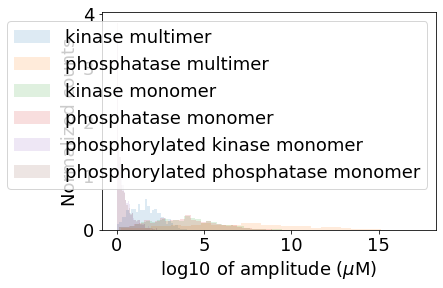

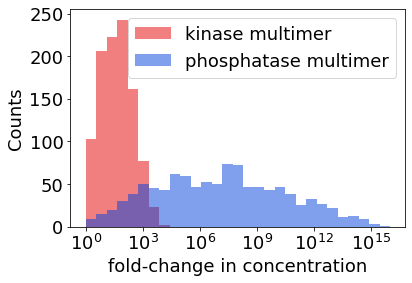

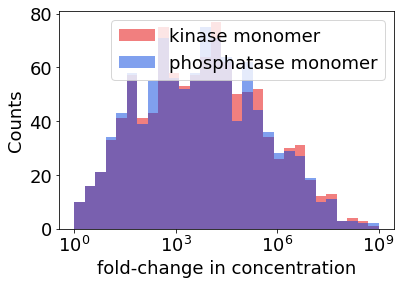

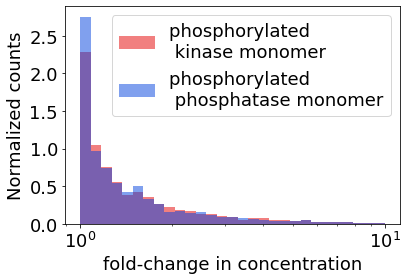

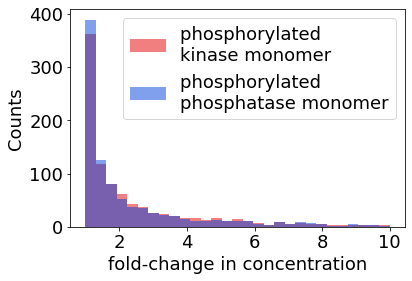

In [42]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

plt.figure()
plt.hist(np.log10(KA_array), 30, density=True, label='kinase multimer', alpha=0.15)
plt.hist(np.log10(PA_array), 30, density=True, label='phosphatase multimer', alpha=0.15)
plt.hist(np.log10(kA_array), 30, density=True, label='kinase monomer', alpha=0.15)
plt.hist(np.log10(pA_array), 30, density=True, label='phosphatase monomer', alpha=0.15)
plt.hist(np.log10(kpA_array), 30, density=True, label='phosphorylated kinase monomer', alpha=0.15)
plt.hist(np.log10(ppA_array), 30, density=True, label='phosphorylated phosphatase monomer', alpha=0.15)
plt.xlabel('log10 of amplitude ($\mu$M)')
plt.ylabel('Normalized counts')
plt.legend()
plt.show()

bins = np.logspace(0, 9, 30) #np.linspace(0, 2, 20)

plt.figure()
plt.hist(KA_array, np.logspace(0, 16, 30), density=False, 
         label='kinase multimer', alpha=0.5, color='xkcd:red')
plt.hist(PA_array, np.logspace(0, 16, 30), density=False, 
         label='phosphatase multimer', alpha=0.5, color='xkcd:blue')
plt.xlabel('fold-change in concentration')
plt.ylabel('Counts')
plt.xscale('log')
plt.xticks([1e0, 1e3, 1e6, 1e9, 1e12, 1e15])
plt.legend()
plt.show()

plt.figure()
plt.hist(kA_array, bins, density=False, 
         label='kinase monomer', alpha=0.5, color='xkcd:red')
plt.hist(pA_array, bins, density=False, 
         label='phosphatase monomer', alpha=0.5, color='xkcd:blue')
plt.xlabel('fold-change in concentration')
plt.ylabel('Counts')
plt.xscale('log')
plt.xticks([1e0, 1e3, 1e6, 1e9])
plt.legend(loc='upper right')
plt.show()

plt.figure()
plt.hist(kpA_array, np.logspace(0, 1, 30), density=True, 
         label='phosphorylated \n kinase monomer', alpha=0.5, color='xkcd:red')
plt.hist(ppA_array, np.logspace(0, 1, 30), density=True, 
         label='phosphorylated \n phosphatase monomer', alpha=0.5, color='xkcd:blue')
plt.xlabel('fold-change in concentration')
plt.ylabel('Normalized counts')
plt.xscale('log')
plt.legend()
plt.show()

plt.figure()
plt.hist(kpA2_array, np.linspace(1, 10, 30), density=False, 
         label='phosphorylated \nkinase monomer', alpha=0.5, color='xkcd:red')
plt.hist(ppA2_array, np.linspace(1, 10, 30), density=False, 
         label='phosphorylated \nphosphatase monomer', alpha=0.5, color='xkcd:blue')
plt.xlabel('fold-change in concentration')
plt.ylabel('Counts')
# plt.xscale('log')
plt.legend()
plt.show()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


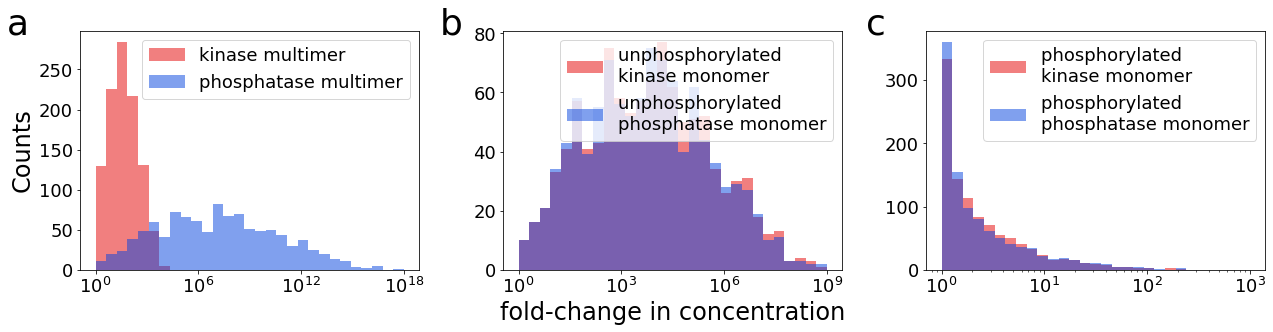

In [43]:
fig, axs = plt.subplots(1,3, figsize=(18, 5))

axs[0].hist(KA_array, bins=np.logspace(0, 18, 30), density=False, 
         label='kinase multimer', alpha=0.5, color='xkcd:red')
axs[0].hist(PA_array, np.logspace(0, 18, 30), density=False, 
         label='phosphatase multimer', alpha=0.5, color='xkcd:blue')
# plt.xlabel('fold-change in concentration')
axs[0].set_ylabel('Counts', fontsize=24)
axs[0].set_xscale('log')
axs[0].set_xticks([1e0, 1e6, 1e12, 1e18])
axs[0].legend()
axs[0].text(-0.15, 1.1, 'a', transform=axs[0].transAxes,
  fontsize=36, fontweight='normal', va='top', ha='right')

axs[1].hist(kA_array, bins=np.logspace(0, 9, 30), density=False, 
         label='unphosphorylated \nkinase monomer', alpha=0.5, color='xkcd:red')
axs[1].hist(pA_array, np.logspace(0, 9, 30), density=False, 
         label='unphosphorylated \nphosphatase monomer', alpha=0.5, color='xkcd:blue')
axs[1].set_xlabel('fold-change in concentration', fontsize=24)
# plt.ylabel('Counts')
axs[1].set_xscale('log')
axs[1].set_xticks([1e0, 1e3, 1e6, 1e9])
axs[1].legend(loc='upper right')
axs[1].text(-0.12, 1.1, 'b', transform=axs[1].transAxes,
  fontsize=36, fontweight='normal', va='top', ha='right')

axs[2].hist(kpA_array, np.logspace(0, 3, 30), density=False, 
         label='phosphorylated \nkinase monomer', alpha=0.5, color='xkcd:red')
axs[2].hist(ppA_array, np.logspace(0, 3, 30), density=False, 
         label='phosphorylated \nphosphatase monomer', alpha=0.5, color='xkcd:blue')
# plt.xlabel('fold-change in concentration')
# plt.ylabel('Counts')
axs[2].set_xscale('log')
axs[2].legend()
axs[2].text(-0.12, 1.1, 'c', transform=axs[2].transAxes,
  fontsize=36, fontweight='normal', va='top', ha='right')

plt.tight_layout(h_pad=0, w_pad=0.2)
# plt.savefig('amplitude_fold_change_bounded_small.png', 
#             bbox_inches='tight')
plt.show()

In [ ]:
max(ppA_array)

In [ ]:
kpA_array[kpA_array>1e3]

In [ ]:
np.log10(max(PA_array))

In [ ]:
print(min(kA_array))
print(min(pA_array))
print(min(kpA_array))
print(min(ppA_array))

In [ ]:
# Initialize amplitude arrays
num_osc_approx = len(Klist_approx)
KA_array_approx = np.zeros(num_osc_approx)
PA_array_approx = np.zeros(num_osc_approx)
kA_array_approx = np.zeros(num_osc_approx)
pA_array_approx = np.zeros(num_osc_approx)
kpA_array_approx = np.zeros(num_osc_approx)
ppA_array_approx = np.zeros(num_osc_approx)
Klist_approx = [None for _ in range(num_osc_approx)]
Plist_approx = [None for _ in range(num_osc_approx)]

In [ ]:
Klist_approx = load('n2m2_for_fig_3_kinase_multimer_integration.pickle')
Plist_approx = load('n2m2_for_fig_3_phosphatase_multimer_integration.pickle')

In [ ]:
num_periods_to_integrate = 12

start = time.time()
for e, params in enumerate(oscParamsn2m2Exp):
    if e % 10 == 0:
        print('Starting parameter set number ' + str(e) + ' out of ' + str(num_osc_approx) + 
              '; time elapsed = ' + str(time.time() - start))
    
    period = oscPeriodsn2m2Exp[e]
    n, m, kba, kbb, kua, kub, etaK, etaP, ktot, ptot, pTilde = params
    
    atol = 1e-16
    rtol = 2.3e-14
    
    if Klist_approx[e] is None:
        z,t = system1_Sol([0, num_periods_to_integrate * period],
                          params, [0, 0], False, False, atol=1e-16, rtol=1e-14)
        ti = np.abs(t - (num_periods_to_integrate-1) * period).argmin()  # index of t one period from the end

        K = z[ti:,0]  # kinase multimer value over one period
        P = z[ti:,1]  # phosphatase multimer value over one period

    else:
        K = Klist_approx[e]
        P = Plist_approx[e]

    k = (ktot - n*K) / (1 + etaK * K / (P + pTilde))
    p = (ptot - m*P) / (1 + etaP * K / (P + pTilde))

    kp = ktot - k - n*K
    pp = ptot - p - m*P
    
    print(min(k))
    print(min(kp))

#     kp2 = etaK * K * (ktot - n*K) / (P + pTilde + etaK * K)  # equivalent to kp
#     pp2 = etaP * K * (ptot - n*P) / (P + pTilde + etaP * K)  # equivalent to pp

    # Measure amplitudes

    # If multimers fluoresce and monomers don't
    KA = amplitude_fxn(K)
    PA = amplitude_fxn(P)

    # If unphosphorylated monomers fluoresce and others don't
    kA = amplitude_fxn(k)
    pA = amplitude_fxn(p)

    # If monomers fluoresce when phosphorylated
    kpA = amplitude_fxn(kp)
    ppA = amplitude_fxn(pp)

#     kpA2 = amplitude_fxn(kp2)
#     ppA2 = amplitude_fxn(pp2)

    KA_array_approx[e] = KA
    PA_array_approx[e] = PA
    kA_array_approx[e] = kA
    pA_array_approx[e] = pA
    kpA_array_approx[e] = kpA
    ppA_array_approx[e] = ppA
    
    Klist_approx[e] = K
    Plist_approx[e] = P

In [278]:
# save(Klist_approx, 'n2m2_for_fig_3_kinase_multimer_integration.pickle')
# save(Plist_approx, 'n2m2_for_fig_3_phosphatase_multimer_integration.pickle')


In [ ]:
oscGammasn2m2Exp = [1/i for i in oscAlpha1sn2m2Exp]
nonOscGammasn2m2Exp = [1/i for i in nonOscAlpha1sn2m2Exp]

In [ ]:
fig, ax = plt.subplots()
plt.scatter(np.array(oscGammasn2m2Exp), 
            np.array(oscAlpha4sn2m2Exp), 
            c=PA_array_approx, alpha=0.2, #s=5,
            norm=matplotlib.colors.LogNorm()
           )
#ax.plot(oscGammasn2m2Exp, oscAlpha4sn2m2Exp, '.', color=[i/256 for i in [12, 123, 220]], 
#        alpha=0.05, label='oscillating')
#ax.plot(nonOscGammasn2m2Exp, nonOscAlpha4sn2m2Exp, '.', color=[i/256 for i in [255, 194, 10]], 
#        alpha=0.05, label='non-oscillating')
ax.plot(np.linspace(min(oscGammasn2m2Exp) * 0.25, max(oscGammasn2m2Exp) * 4, num=4), 
         np.ones(4), '--', color='k')
ax.plot(np.ones(4), 
         np.linspace(min(oscAlpha4sn2m2Exp) * 0.25, max(oscAlpha4sn2m2Exp) * 4, num=4), 
         '--', color='k')
plt.ylabel(r'$\nu$')
plt.xlabel(r'$\gamma$')
plt.xscale('log')
plt.yscale('log')
# plt.xticks([10**-28, 10**-14, 10**0])
# plt.yticks([10**-5, 10**0, 10**5])
#plt.title(r'$n=m=2$')
cbar = plt.colorbar()
# cbar.set_ticks([-1e6, -1e3, -1e0, 0, 1e0, 1e3, 1e6])
cbar.set_label(r'$P$ amplitude')
plt.show()

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7), sharex=True, sharey=True)

im = axs[0, 0].scatter(np.array(oscGammasn2m2Exp), 
            np.array(oscAlpha4sn2m2Exp), 
            c=PA_array_approx, alpha=0.2, #s=5,
            norm=matplotlib.colors.LogNorm()
           )
axs[0, 0].plot(np.linspace(min(oscGammasn2m2Exp) * 0.5, max(oscGammasn2m2Exp), num=4), 
         np.ones(4), '--', color='k')
axs[0, 0].plot(np.ones(4), 
         np.linspace(min(oscAlpha4sn2m2Exp) * 0.25, max(oscAlpha4sn2m2Exp), num=4), 
         '--', color='k')
axs[0, 0].set_ylabel(r'$\nu$')
# axs[0, 0].set_xlabel(r'$\gamma$')

cbar = plt.colorbar(im, ax=axs[0, 0])
# cbar.set_ticks([-1e6, -1e3, -1e0, 0, 1e0, 1e3, 1e6])
# cbar.set_label(r'$P$ amplitude')
axs[0, 0].set_title(r'$P$ amplitude')



im = axs[0, 1].scatter(np.array(oscGammasn2m2Exp), 
            np.array(oscAlpha4sn2m2Exp), 
            c=KA_array_approx, alpha=0.2, #s=5,
            norm=matplotlib.colors.LogNorm()
           )
axs[0, 1].plot(np.linspace(min(oscGammasn2m2Exp) * 0.5, max(oscGammasn2m2Exp), num=4), 
         np.ones(4), '--', color='k')
axs[0, 1].plot(np.ones(4), 
         np.linspace(min(oscAlpha4sn2m2Exp) * 0.25, max(oscAlpha4sn2m2Exp), num=4), 
         '--', color='k')
# axs[0, 1].set_ylabel(r'$\nu$')
# axs[0, 1].set_xlabel(r'$\gamma$')

cbar = plt.colorbar(im, ax=axs[0, 1])
# cbar.set_ticks([-1e6, -1e3, -1e0, 0, 1e0, 1e3, 1e6])
# cbar.set_label(r'$K$ amplitude')
axs[0, 1].set_title(r'$K$ amplitude')


im = axs[1, 0].scatter(np.array(oscGammasn2m2Exp), 
            np.array(oscAlpha4sn2m2Exp), 
            c=pA_array_approx, alpha=0.2, #s=5,
            norm=matplotlib.colors.LogNorm()
           )
axs[1, 0].plot(np.linspace(min(oscGammasn2m2Exp) * 0.5, max(oscGammasn2m2Exp), num=4), 
         np.ones(4), '--', color='k')
axs[1, 0].plot(np.ones(4), 
         np.linspace(min(oscAlpha4sn2m2Exp) * 0.25, max(oscAlpha4sn2m2Exp), num=4), 
         '--', color='k')
axs[1, 0].set_ylabel(r'$\nu$')
axs[1, 0].set_xlabel(r'$\gamma$')

cbar = plt.colorbar(im, ax=axs[1, 0])
# cbar.set_ticks([-1e6, -1e3, -1e0, 0, 1e0, 1e3, 1e6])
# cbar.set_label(r'$\rho$ amplitude')
axs[1,0].set_title(r'$\rho$ amplitude')



im = axs[1, 1].scatter(np.array(oscGammasn2m2Exp), 
            np.array(oscAlpha4sn2m2Exp), 
            c=kA_array_approx, alpha=0.2, #s=5,
            norm=matplotlib.colors.LogNorm()
           )
axs[1, 1].plot(np.linspace(min(oscGammasn2m2Exp) * 0.5, max(oscGammasn2m2Exp), num=4), 
         np.ones(4), '--', color='k')
axs[1, 1].plot(np.ones(4), 
         np.linspace(min(oscAlpha4sn2m2Exp) * 0.25, max(oscAlpha4sn2m2Exp), num=4), 
         '--', color='k')
# axs[0, 1].set_ylabel(r'$\nu$')
axs[1, 1].set_xlabel(r'$\gamma$')
axs[1, 1].set_xscale('log')
axs[1, 1].set_yscale('log')
axs[1, 1].set_xticks([1e0, 1e3, 1e6])
axs[1, 1].set_yticks([10**0, 10**2, 10**4])
axs[1, 1].set_xlim([5e-2, 1e7])

cbar = plt.colorbar(im, ax=axs[1, 1])
# cbar.set_ticks([-1e6, -1e3, -1e0, 0, 1e0, 1e3, 1e6])
# cbar.set_label(r'$\kappa$ amplitude')
axs[1, 1].set_title(r'$\kappa$ amplitude')

plt.tight_layout(h_pad=0, w_pad=0.2)

# plt.savefig('n2m2_amplitude_gamma_nu.png', 
#             dpi=800, bbox_inches='tight')
# plt.savefig('n2m2_amplitude_gamma_nu_small.png', 
#             bbox_inches='tight')
plt.show()

In [270]:
np.log10(max(oscAlpha4sn2m2Exp))

5.078121382655827